# Toy Examples

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from sklearn.decomposition import PCA, FastICA
%matplotlib inline

### Most obvious example, when protein structures lie on a manifold

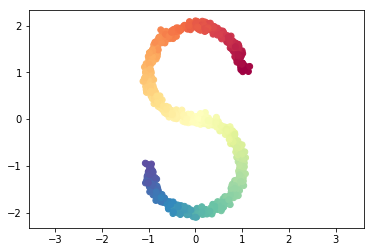

In [344]:
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
X = X[:, [0,2]] + np.random.normal(scale=0.05, size=(n_points, 2))
n_components = 2
rand_idx = np.array(range(n_points))
np.random.shuffle(rand_idx)
X = X[rand_idx, :]
color = color[rand_idx]
plt.scatter(X[:, 0], X[:, 1] , c=color, cmap=plt.cm.Spectral); plt.axis('equal');

In [345]:
# Regular PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

# ISOMAP/PCA
n_neighbors = 50
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
isomap_pca_X = pca.fit_transform(isomap.fit_transform(X))

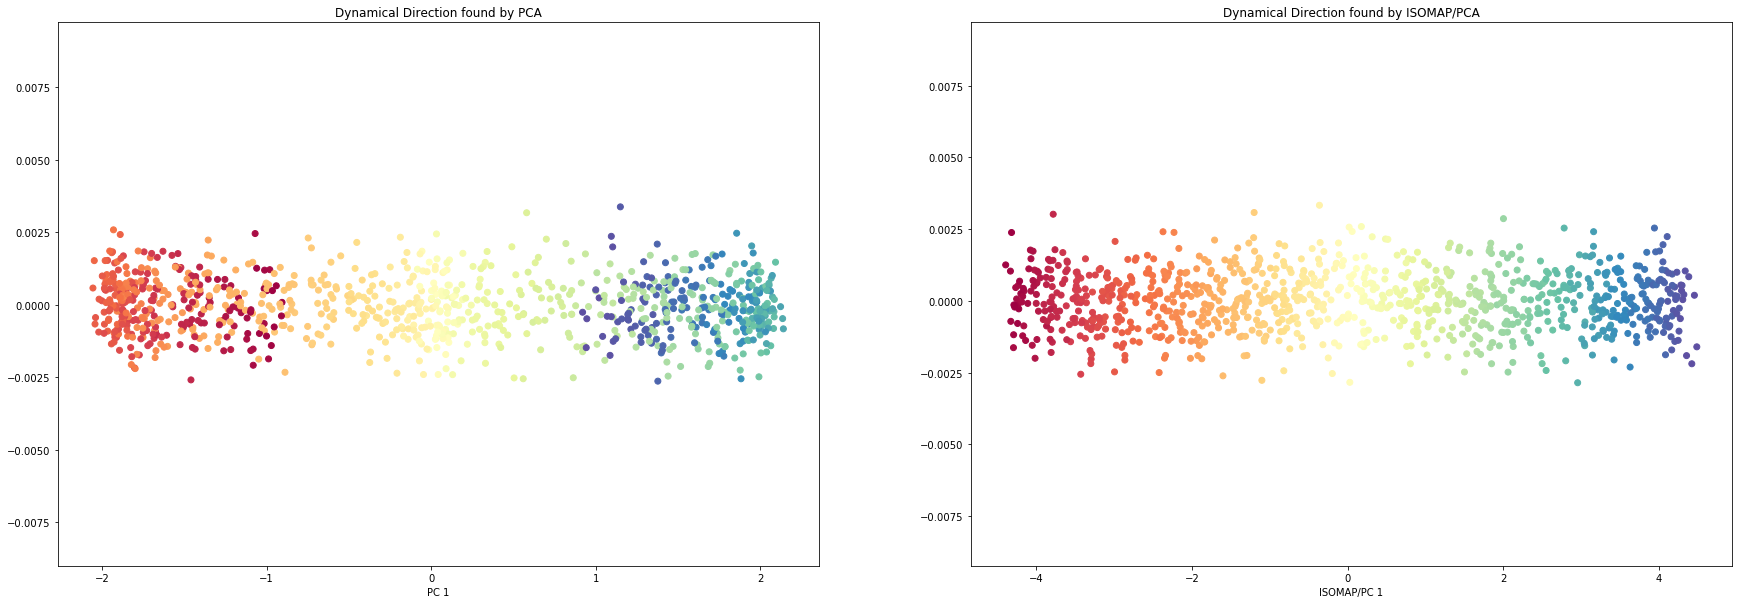

In [346]:
plt.figure(figsize=(3*10, 10))
plt.subplot(1, 2, 1)
plt.scatter(pca_X[:, 0], np.random.normal(scale=0.001, size=(n_points, 1)) , c=color, cmap=plt.cm.Spectral)
plt.xlabel('PC 1'); plt.title('Dynamical Direction found by PCA')
plt.subplot(1, 2, 2)
plt.scatter(isomap_pca_X[:, 0], np.random.normal(scale=0.001, size=(n_points, 1)) , c=color, cmap=plt.cm.Spectral)
plt.xlabel('ISOMAP/PC 1'); plt.title('Dynamical Direction found by ISOMAP/PCA')

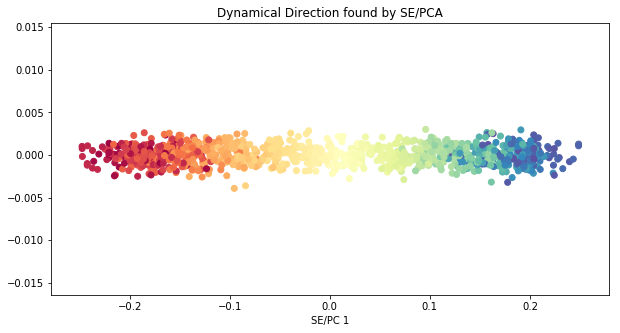

In [358]:
# SE/PCA
n_neighbors = 20
se_pca = PCA(n_components=1)
se = manifold.SpectralEmbedding(n_neighbors=n_neighbors, n_components=1)
rd_X = se.fit_transform(X)
rd_pca_X = se_pca.fit_transform(rd_X)
plt.figure(figsize=(10, 5))
plt.scatter(rd_X[:, 0], np.random.normal(scale=0.001, size=(n_points, 1)) , c=color, cmap=plt.cm.Spectral)
plt.xlabel('SE/PC 1'); plt.title('Dynamical Direction found by SE/PCA')

In [351]:
rd_X.shape

(1000, 2)

In [332]:
# ICA
n_neighbors = 20
ica = FastICA(n_components=1)
ica_X = ica.fit_transform(X)

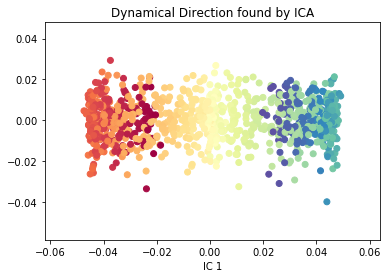

In [333]:
plt.scatter(ica_X[:, 0], np.random.normal(scale=0.01, size=(n_points, 1)) , c=color, cmap=plt.cm.Spectral)
plt.xlabel('IC 1'); plt.title('Dynamical Direction found by ICA')

### Another snaking example

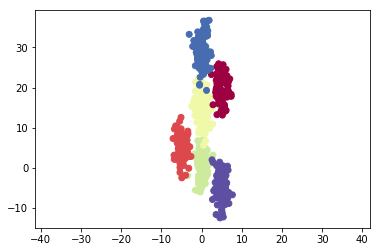

In [359]:
n_points = 100
n_components = 2
X1 = np.random.multivariate_normal(mean=[0,0], cov=[[1,0],[0,10]], size=n_points)
X2 = np.random.multivariate_normal(mean=[5,-5], cov=[[1,0],[0,10]], size=n_points)
X3 = np.random.multivariate_normal(mean=[-5,5], cov=[[1,0],[0,10]], size=n_points)
X4 = np.random.multivariate_normal(mean=[0,15], cov=[[1,0],[0,10]], size=n_points)
X5 = np.random.multivariate_normal(mean=[5,20], cov=[[1,0],[0,10]], size=n_points)
X6 = np.random.multivariate_normal(mean=[0,30], cov=[[1,0],[0,10]], size=n_points)
c = np.concatenate([color[0]*np.ones(n_points), color[100]*np.ones(n_points),\
                    color[200]*np.ones(n_points), color[300]*np.ones(n_points), \
                    color[400]*np.ones(n_points), color[800]*np.ones(n_points)])
X = np.concatenate([X1, X2, X3, X4, X5, X6], axis=0)
plt.scatter(X[:, 0], X[:, 1], c=c, cmap=plt.cm.Spectral); plt.axis('equal');

In [367]:
# Regular PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

# ISOMAP/PCA
n_neighbors = 4
iso_pca = PCA(n_components=1)
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=1)
isomap_pca_X = iso_pca.fit_transform(isomap.fit_transform(X))

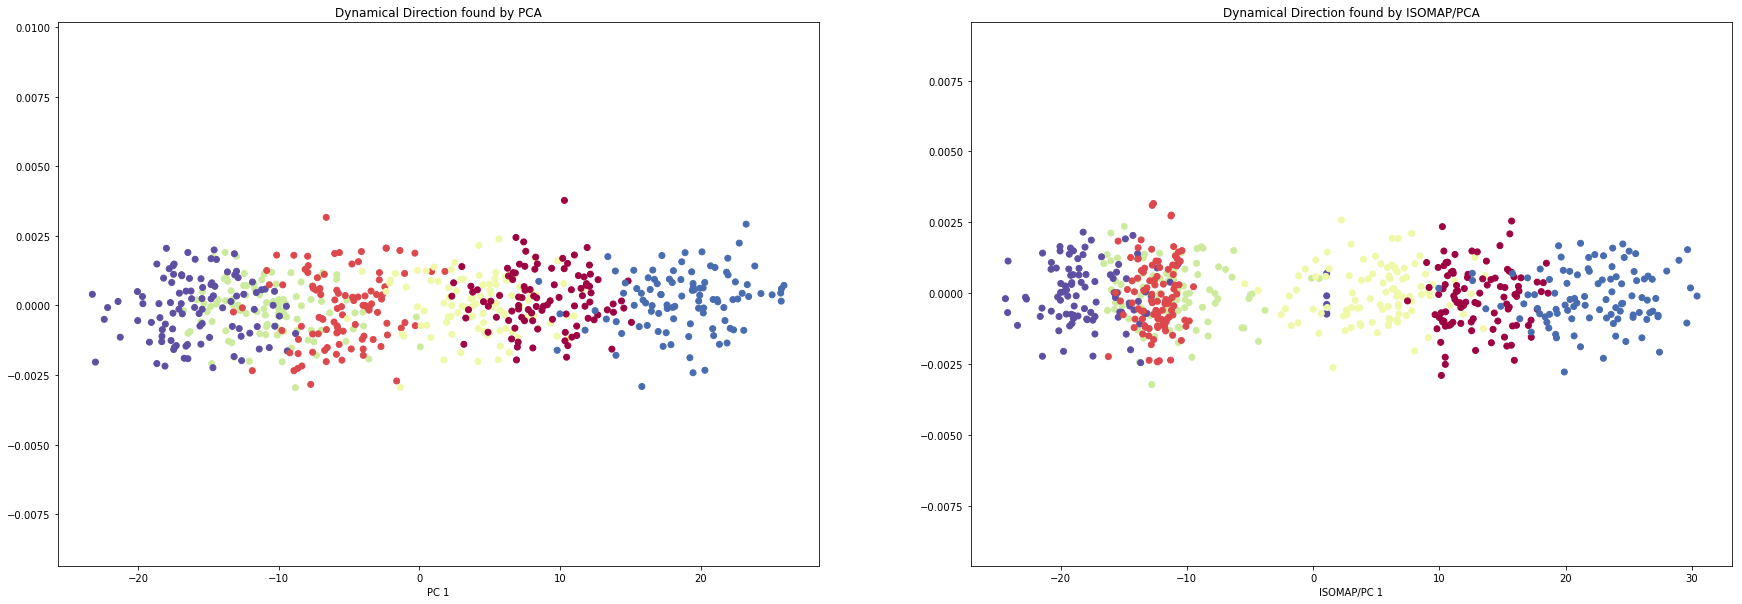

In [369]:
plt.figure(figsize=(3*10, 10))
plt.subplot(1, 2, 1)
plt.scatter(pca_X[:, 0], np.random.normal(scale=0.001, size=(n_points*6, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('PC 1'); plt.title('Dynamical Direction found by PCA')
plt.subplot(1, 2, 2)
plt.scatter(isomap_pca_X[:, 0], np.random.normal(scale=0.001, size=(n_points*6, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('ISOMAP/PC 1'); plt.title('Dynamical Direction found by ISOMAP/PCA')

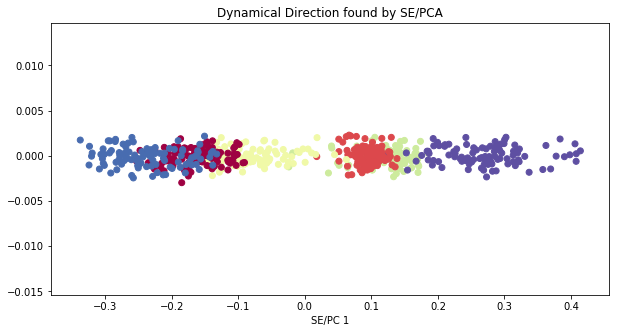

In [372]:
# SE/PCA
n_neighbors = 20
se_pca = PCA(n_components=1)
se = manifold.SpectralEmbedding(n_neighbors=n_neighbors, n_components=1)
rd_X = se.fit_transform(X)
rd_pca_X = se_pca.fit_transform(rd_X)
plt.figure(figsize=(10, 5))
plt.scatter(rd_X[:, 0], np.random.normal(scale=0.001, size=(6*n_points, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('SE/PC 1'); plt.title('Dynamical Direction found by SE/PCA')

### When tICA does better, SpectralEmbedding rocks!

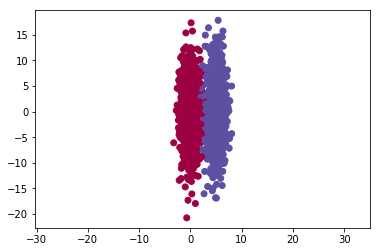

In [336]:
n_points = 1000
n_components = 2
X1 = np.random.multivariate_normal(mean=[0,0], cov=[[1,0],[0,30]], size=n_points)
X2 = np.random.multivariate_normal(mean=[5,0], cov=[[1,0],[0,30]], size=n_points)
c = np.concatenate([color[0]*np.ones(n_points), color[100]*np.ones(n_points)])
X = np.concatenate([X1, X2], axis=0)
rand_idx = np.array(range(2*n_points))
np.random.shuffle(rand_idx)
X = X[rand_idx, :]
c = c[rand_idx]
plt.scatter(X[:, 0], X[:, 1], c=c, cmap=plt.cm.Spectral); plt.axis('equal');

In [337]:
# Regular PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

# SE/PCA
n_neighbors = 20
se_pca = PCA(n_components=1)
se = manifold.SpectralEmbedding(n_neighbors=n_neighbors, n_components=n_components)
rd_pca_X = se_pca.fit_transform(se.fit_transform(X))

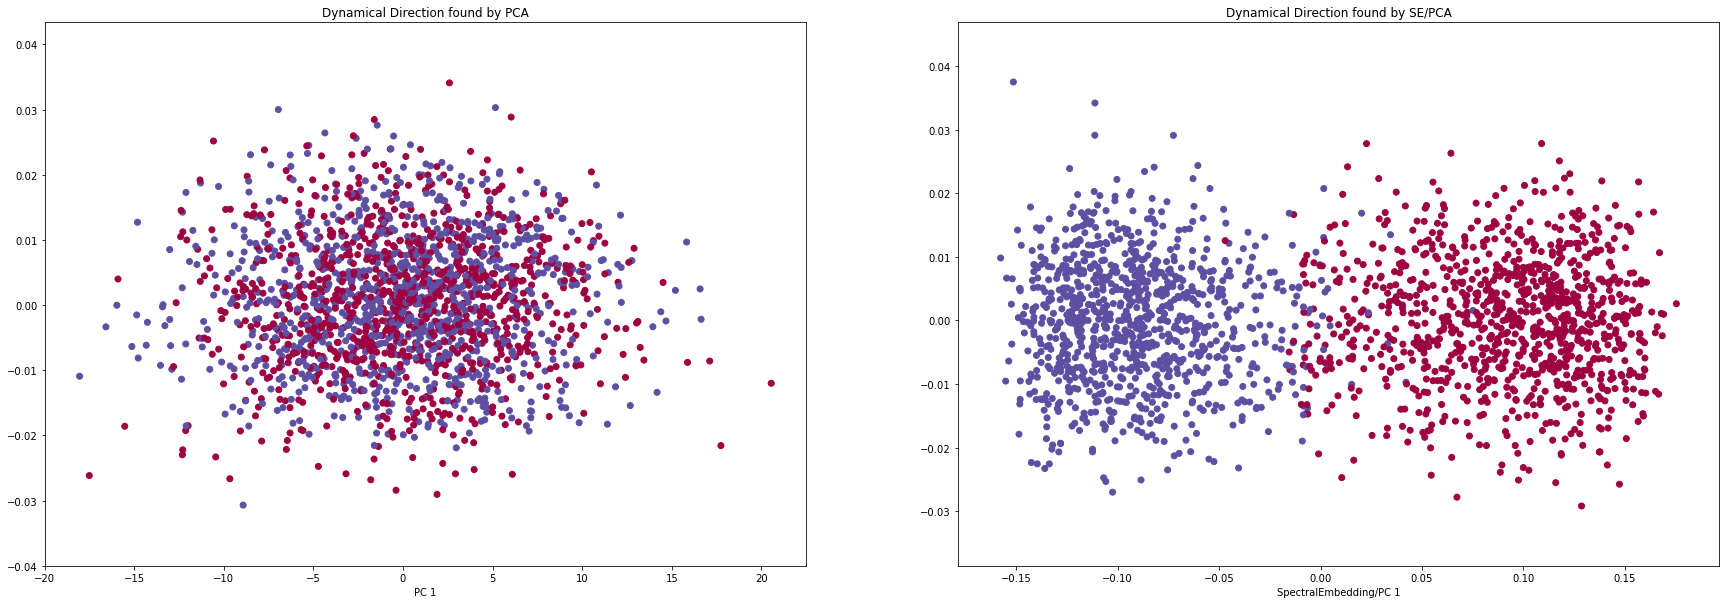

In [338]:
plt.figure(figsize=(3*10, 10))
plt.subplot(1, 2, 1)
plt.scatter(pca_X[:, 0], np.random.normal(scale=0.01, size=(n_points*2, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('PC 1'); plt.title('Dynamical Direction found by PCA')
plt.subplot(1, 2, 2)
plt.scatter(rd_pca_X[:, 0], np.random.normal(scale=0.01, size=(n_points*2, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('SpectralEmbedding/PC 1'); plt.title('Dynamical Direction found by SE/PCA')

In [339]:
# Regular PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

# ISOMAP/PCA
n_neighbors = 20
isomap_pca = PCA(n_components=1)
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
iso_pca_X = isomap_pca.fit_transform(isomap.fit_transform(X))

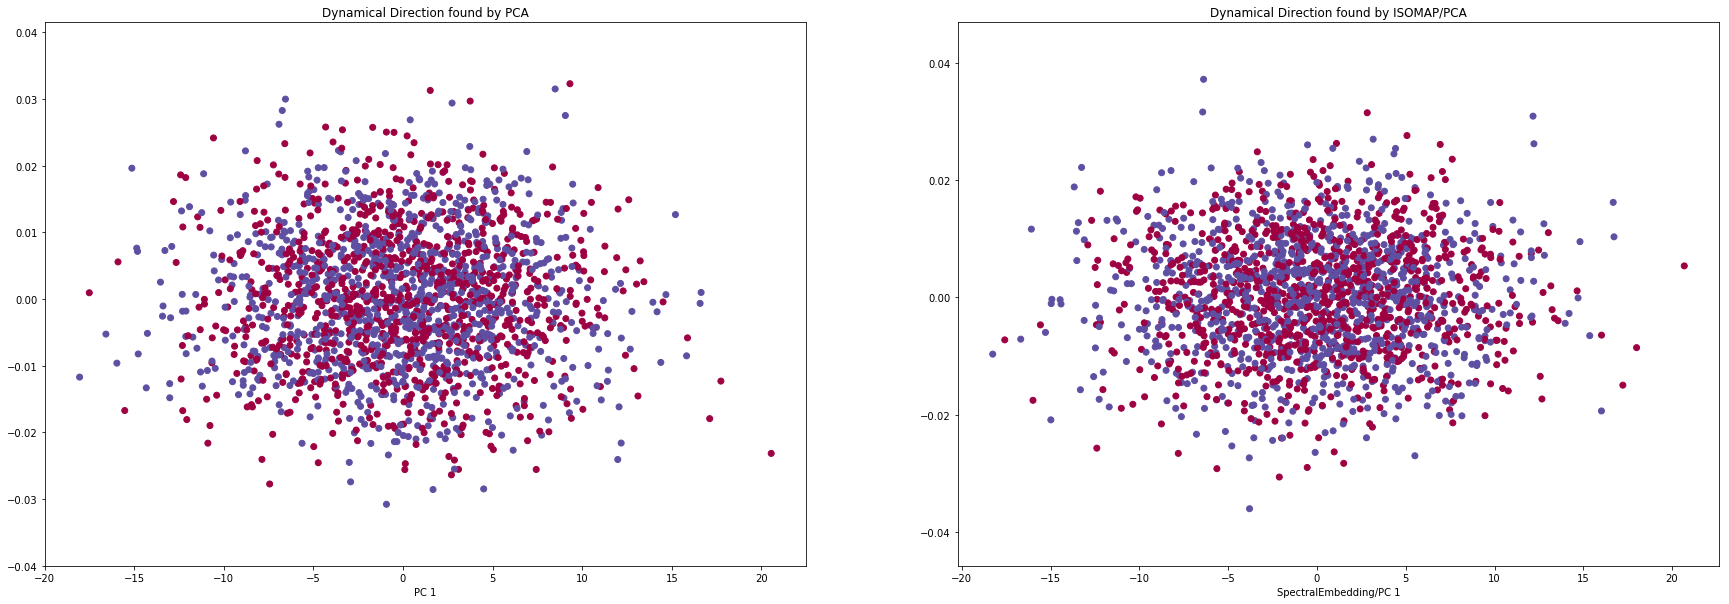

In [340]:
plt.figure(figsize=(3*10, 10))
plt.subplot(1, 2, 1)
plt.scatter(pca_X[:, 0], np.random.normal(scale=0.01, size=(n_points*2, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('PC 1'); plt.title('Dynamical Direction found by PCA')
plt.subplot(1, 2, 2)
plt.scatter(iso_pca_X[:, 0], np.random.normal(scale=0.01, size=(n_points*2, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('SpectralEmbedding/PC 1'); plt.title('Dynamical Direction found by ISOMAP/PCA')

In [341]:
# Regular PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

# ICA
n_neighbors = 20
ica = FastICA(n_components=2)
ica_X = ica.fit_transform(X)

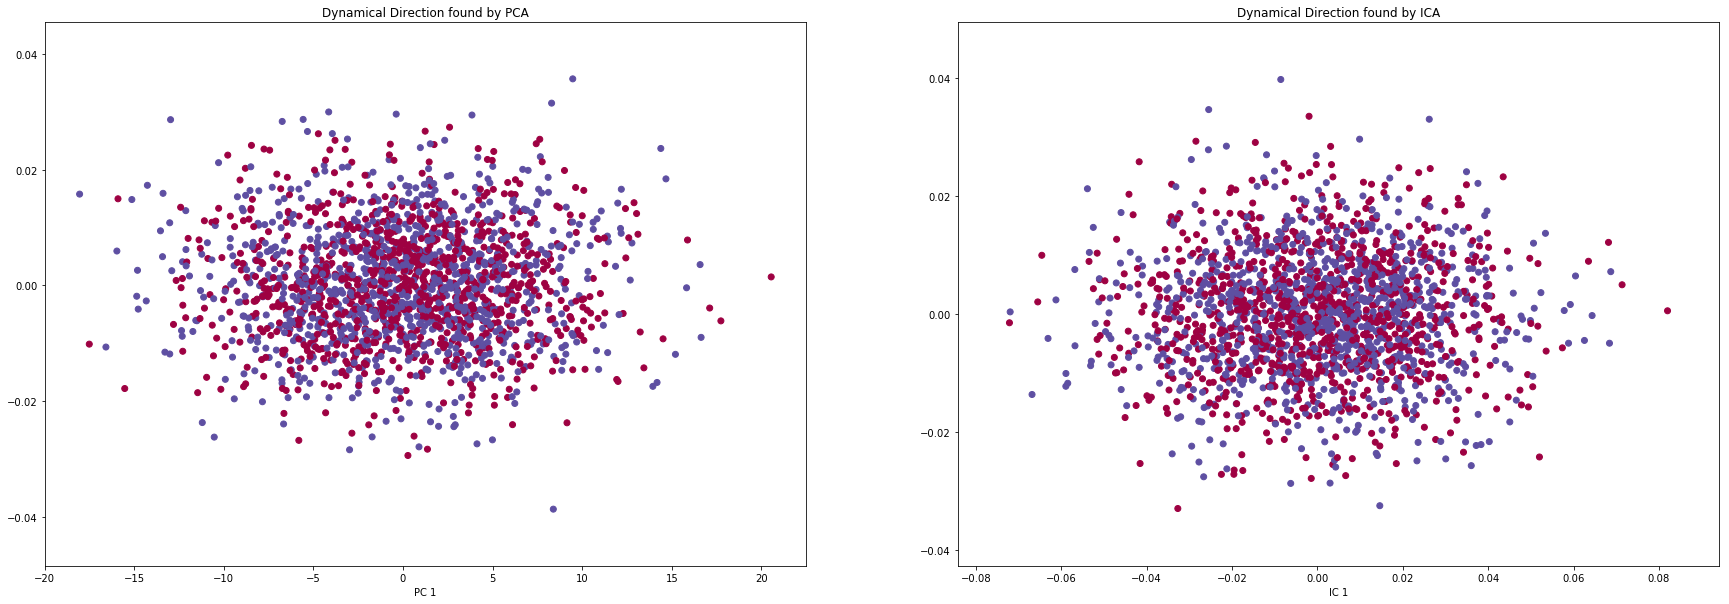

In [342]:
plt.figure(figsize=(3*10, 10))
plt.subplot(1, 2, 1)
plt.scatter(pca_X[:, 0], np.random.normal(scale=0.01, size=(n_points*2, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('PC 1'); plt.title('Dynamical Direction found by PCA')
plt.subplot(1, 2, 2)
plt.scatter(ica_X[:, 0], np.random.normal(scale=0.01, size=(n_points*2, 1)) , c=c, cmap=plt.cm.Spectral)
plt.xlabel('IC 1'); plt.title('Dynamical Direction found by ICA')